In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import linregress
%matplotlib notebook
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)
import time
%matplotlib notebook

In [ ]:
import bluepysnap as bp
path_to_simulation = 'compareModalities/f554be01-456c-4a15-8670-df39a3187b7e/0/'
s = bp.Simulation(path_to_simulation+'simulation_config.json')
population_name = s.reports['lfp_report'].population_names[0]

r  = s.reports['lfp_report'][population_name]

types = list(s.circuit.nodes.property_values('mtype'))

In [3]:
regions = ['S1FL','S1DZ','S1DZO','S1HL','S1Sh','S1Tr','S1ULp']

types = np.sort(list(s.circuit.nodes.property_values('mtype')))

index = 0

path_to_spikes = 'compareModalities/f554be01-456c-4a15-8670-df39a3187b7e/0/pkls/'

for region in regions:
    for t in types:
        
        report = pd.read_pickle(path_to_spikes+'/spikes_'+region+'_'+t+'.pkl')
        
        if index == 0:
            spikeReports = report
        else:
            spikeReports = pd.concat((spikeReports,report))
        

In [4]:
   
EEGs = {}

f = path_to_simulation+'/pkls/eegs/'

for file in os.listdir(f):
    t = file.split('.')[0]
    EEGs[t] = pd.read_pickle(f+file)
    

In [5]:
regions = ['S1FL','S1DZ','S1DZO','S1HL','S1Sh','S1Tr','S1ULp']

byRegion = {}

for region in regions:
    
    byRegion[region] = 0
    
    for key in EEGs.keys():
        if region in key:
            byRegion[region] += EEGs[key]


In [6]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [7]:
eegTotal = 0
err = 0
for key, value in EEGs.items():
    eegTotal += value

        


<IPython.core.display.Javascript object>


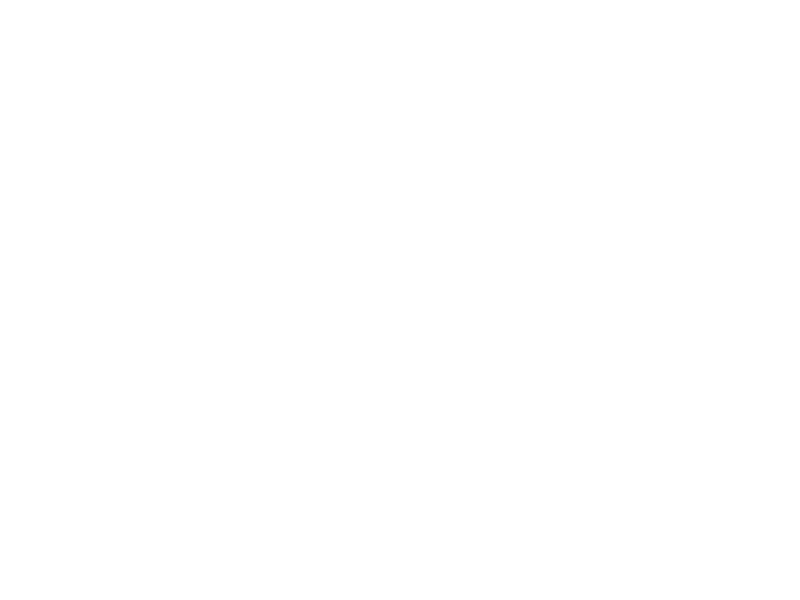

In [8]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)

plt.scatter(spikeReports.index,spikeReports.values,s=.1)
plt.gca().yaxis.set_visible(False)
plt.gca().xaxis.set_visible(False)
plt.xlim([2000,5000])

plt.subplot(2,1,2)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])

for region in regions:
    plt.plot(byRegion[region]['Forelimb_EEG_Reciprocity'])
    
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Total signal']+regions)

plt.xlim([2000,5000])

plt.tight_layout()

plt.savefig('figures/eegByRegion.png',dpi=300)

<IPython.core.display.Javascript object>


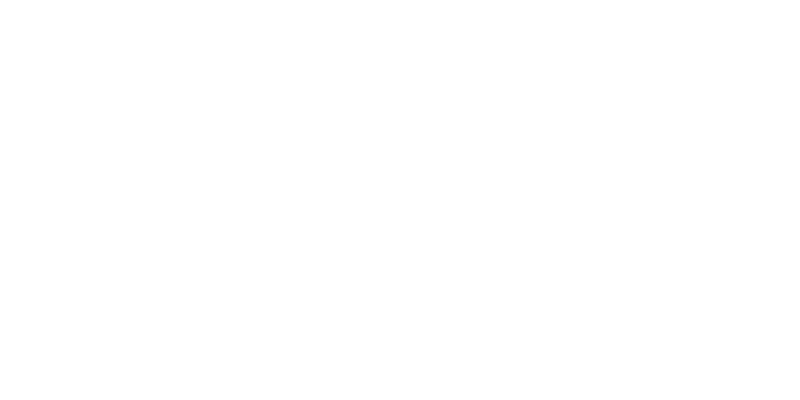

In [9]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])
plt.plot(eegTotal['Forelimb_ECoG_Reciprocity'])


plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['EEG','ECoG'])
plt.tight_layout()
plt.xlim([2000,5000])

plt.subplot(1,2,2)

for i, region in enumerate(regions):
    plt.plot(byRegion[region]['Forelimb_ECoG_Reciprocity'],c='C'+str(i+1))
    
plt.xlabel('Time (ms)')
plt.tight_layout()
plt.xlim([2000,5000])
plt.legend(regions)

plt.savefig('figures/eegvsecog.png',dpi=300)

<IPython.core.display.Javascript object>


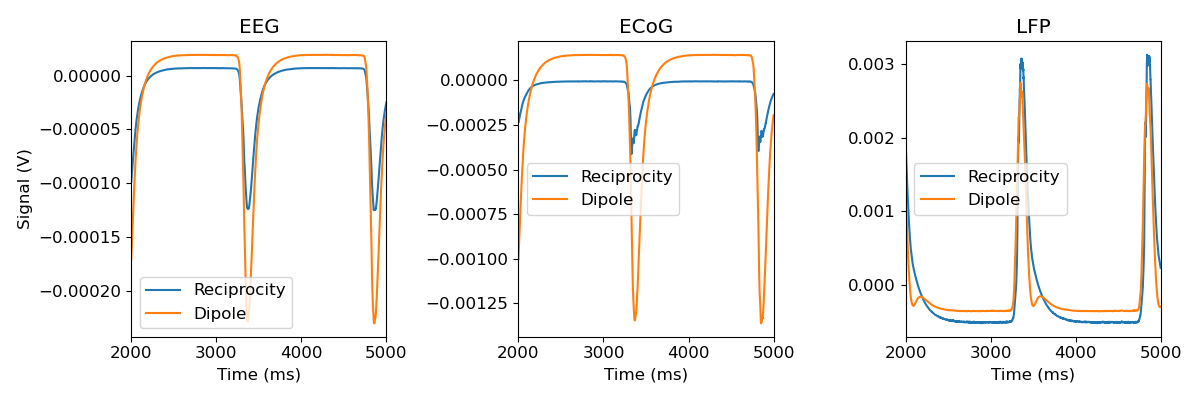

In [23]:
plt.figure(figsize=(12,4))


plt.subplot(1,3,1)

plt.plot(eegTotal['Forelimb_EEG_Reciprocity'])
plt.plot(eegTotal['Forelimb_EEG_Dipole'])
plt.xlabel('Time (ms)')
plt.xlim([2000,5000])
plt.ylabel('Signal (V)')
plt.legend(['Reciprocity','Dipole'])
plt.title('EEG')
plt.tight_layout()


plt.subplot(1,3,2)

plt.plot(eegTotal['Forelimb_ECoG_Reciprocity'])
plt.plot(eegTotal['Forelimb_ECoG_Dipole'])
plt.xlabel('Time (ms)')
plt.xlim([2000,5000])
plt.legend(['Reciprocity','Dipole'])
plt.title('ECoG')
plt.tight_layout()

plt.subplot(1,3,3)

plt.plot(eegTotal['Forelimb_LFP_Reciprocity'])
plt.plot(eegTotal['Forelimb_LFP_Dipole'])
plt.xlabel('Time (ms)')
plt.xlim([2000,5000])
plt.legend(['Reciprocity','Dipole'])
plt.title('LFP')
plt.tight_layout()

plt.savefig('figures/compareDipole.png',dpi=300)

<IPython.core.display.Javascript object>


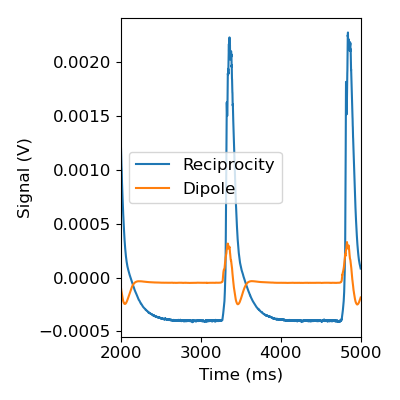

In [24]:
plt.figure(figsize=(4,4))
plt.plot(byRegion['S1FL']['Forelimb_LFP_Reciprocity'])
plt.plot(byRegion['S1FL']['Forelimb_LFP_Dipole'])
plt.xlabel('Time (ms)')
plt.ylabel('Signal (V)')
plt.legend(['Reciprocity','Dipole'])
plt.xlim([2000,5000])
plt.tight_layout()
plt.savefig('figures/LFPDipole.png',dpi=300)

In [3]:
circuit = s.circuit

In [4]:
nodes = circuit.nodes

In [5]:
nFl = nodes.get('S1FL',properties=['mtype'])
nHl = nodes.get('S1HL',properties=['mtype'])
nULp = nodes.get('S1ULp',properties=['mtype'])

In [6]:
Fl = next(nFl)[1]
Fl = np.array(list(Fl[Fl['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

Hl = next(nHl)[1]
Hl = np.array(list(Hl[Hl['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

ULp = next(nULp)[1]
ULp = np.array(list(ULp[ULp['mtype']=='L5_TPC:A'].index))[:,1].astype(int)

In [7]:
import h5py

In [8]:
coeffsFile = "/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/ddfc78fe-e349-41e2-b000-1ff92bf0f1b5/0/coeffsEcog_EEG.h5"

coeffs = h5py.File(coeffsFile)

In [9]:
allNodeIds = coeffs['S1nonbarrel_neurons']['node_ids']

In [10]:
flIndex = np.where(np.isin(allNodeIds[:],Fl))[0]
hlIndex = np.where(np.isin(allNodeIds[:],Hl))[0]
ulpIndex = np.where(np.isin(allNodeIds[:],ULp))[0]


In [11]:
np.random.seed(1776)

flIndex = np.sort(np.random.choice(flIndex,1000))
hlIndex = np.sort(np.random.choice(hlIndex,1000))
ulpIndex = np.sort(np.random.choice(ulpIndex,1000))




In [21]:
FLshort = allNodeIds[:][flIndex]
HLshort = allNodeIds[:][hlIndex]
ULPshort = allNodeIds[:][ulpIndex]

In [12]:
flOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][flIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][flIndex+1]]
hlOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][hlIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][hlIndex+1]]
ulpOffsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][ulpIndex],coeffs['S1nonbarrel_neurons']['offsets'][:][ulpIndex+1]]


In [13]:
scaleFacFl = []
scaleFacHl = []
scaleFacULp = []

for i in range(len(flOffsets[0])):
    
    sfl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][flOffsets[0][i]:flOffsets[1][i]][:,1]
    sfl -= sfl[0]
    
    shl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][hlOffsets[0][i]:hlOffsets[1][i]][:,1]
    shl -= shl[0]
    
    sulp = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][ulpOffsets[0][i]:ulpOffsets[1][i]][:,1]
    sulp -= sulp[0]

    scaleFacFl.append( sfl )
    scaleFacHl.append( shl )
    scaleFacULp.append( sulp )

scaleFacFl = [s for item in scaleFacFl for s in item]
scaleFacHl = [s for item in scaleFacHl for s in item]
scaleFacULp = [s for item in scaleFacULp for s in item]

scaleFacFlEcog = []
scaleFacHlEcog = []
scaleFacULpEcog = []

for i in range(len(flOffsets[0])):
    
    sfl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][flOffsets[0][i]:flOffsets[1][i]][:,0]
    sfl -= sfl[0]
    
    shl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][hlOffsets[0][i]:hlOffsets[1][i]][:,0]
    shl -= shl[0]
    
    sulp = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][ulpOffsets[0][i]:ulpOffsets[1][i]][:,0]
    sulp -= sulp[0]

    scaleFacFlEcog.append( sfl )
    scaleFacHlEcog.append( shl )
    scaleFacULpEcog.append( sulp )

scaleFacFlEcog = [s for item in scaleFacFlEcog for s in item]
scaleFacHlEcog = [s for item in scaleFacHlEcog for s in item]
scaleFacULpEcog = [s for item in scaleFacULpEcog for s in item]


In [15]:
len(scaleFacHl)

704231

<IPython.core.display.Javascript object>


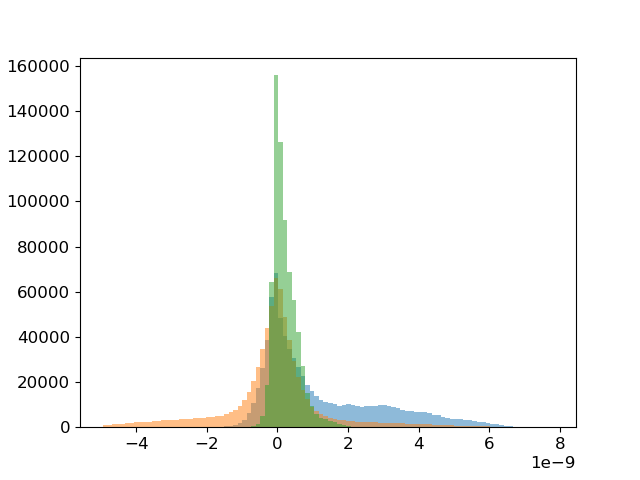

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 3.00000e+00, 2.00000e+00, 4.00000e+00, 9.00000e+00,
        1.30000e+01, 1.30000e+01, 2.40000e+01, 2.90000e+01, 4.80000e+01,
        7.30000e+01, 1.35000e+02, 2.28000e+02, 5.07000e+02, 1.36300e+03,
        5.11100e+03, 1.88950e+04, 6.42790e+04, 1.55878e+05, 1.26512e+05,
        9.18450e+04, 6.86820e+04, 5.61500e+04, 4.19650e+04, 2.68840e+04,
        1.53080e+04, 9.18900e+03, 5.77300e+03, 4.19900e+03, 3.59000e+03,
        2.90300e+03, 2.12100e+03, 1.30100e+03, 9.70000e+02, 5.48000e+02,
        2.82000e+02, 1.37000e+02, 1.08000e+02, 3.40000e+01, 6.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

In [16]:
plt.figure()
_, bins,_ = plt.hist(scaleFacFl,alpha=0.5,bins=100)
plt.hist(scaleFacHl,alpha=0.5,bins=bins)
plt.hist(scaleFacULp,alpha=0.5,bins=bins)

<IPython.core.display.Javascript object>


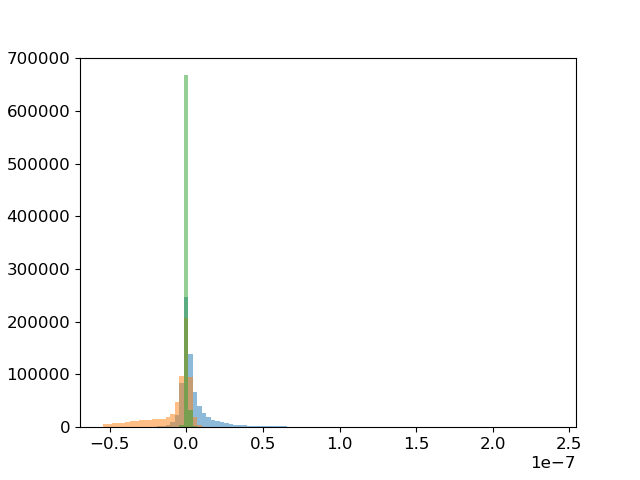

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+00, 3.20000e+01, 3.25800e+03, 6.67525e+05, 3.27120e+04,
        1.52500e+03, 6.40000e+01, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

In [17]:
plt.figure()
_,bins,_ = plt.hist(scaleFacFlEcog,alpha=0.5,bins=100)
plt.hist(scaleFacHlEcog,alpha=0.5,bins=bins)
plt.hist(scaleFacULpEcog,alpha=0.5,bins=bins)

In [18]:
plt.figure()
_,bins,_ = plt.hist(scaleFacFl,alpha=0.5,bins=100)
plt.hist(scaleFacFlEcog,alpha=0.5,bins=bins)


<IPython.core.display.Javascript object>

(array([ 1554.,  1619.,  1706.,  1846.,  1912.,  2007.,  2151.,  2333.,
         2379.,  2537.,  2649.,  2867.,  3017.,  3168.,  3358.,  3617.,
         3848.,  4048.,  4271.,  4587.,  4806.,  5101.,  5281.,  5850.,
         6116.,  6572.,  6956.,  7535.,  8001.,  8463.,  9103.,  9879.,
        10367., 10981., 11746., 12252., 12962., 13519., 14633., 12535.,
        12130., 11951., 11483., 11169., 10930., 10465.,  9876.,  9638.,
         9452.,  8754.,  8539.,  8213.,  8064.,  7839.,  7366.,  7047.,
         6741.,  6455.,  6282.,  6065.,  5673.,  5325.,  5354.,  5205.,
         4825.,  4690.,  4604.,  4409.,  4213.,  4131.,  4202.,  3935.,
         3889.,  3729.,  3599.,  3539.,  3460.,  3294.,  3132.,  3104.,
         3008.,  2834.,  2914.,  2757.,  2761.,  2661.,  2694.,  2543.,
         2545.,  2506.,  2467.,  2391.,  2406.,  2419.,  2228.,  2169.,
         2251.,  2211.,  2103.,  2080.]),
 array([-4.95077552e-09, -4.82310376e-09, -4.69543201e-09, -4.56776025e-09,
        -4.4400885

In [19]:
path_to_positions = "/gpfs/bbp.cscs.ch/project/proj85/scratch/from68/sonata_circuits/fullSSCx/ddfc78fe-e349-41e2-b000-1ff92bf0f1b5/0/positions_all_new/"


In [22]:
allIds = [FLshort,HLshort,ULPshort]

allIds = [s for item in allIds for s in item]

allIds = np.array(allIds)

import os

i = 0
for subfolder in os.listdir(path_to_positions):
    for file in os.listdir(path_to_positions+subfolder):
        
        if i > 10:
            break
        
        positions = pd.read_pickle(path_to_positions+subfolder+'/'+file)
        
        columns = np.array(list(positions.columns))[:,0]
        
        indices = np.where(np.isin(allIds,columns))[0]
        
        if len(indices)==0:
            continue
        
        idsInFile = allIds[indices]

        positions = positions[idsInFile]
        
        
        if i == 0:
            allPositions = positions
        else:
            allPositions = pd.concat((allPositions,positions),axis=1)
            
        i += 1
        
        

KeyboardInterrupt: 

In [55]:
ids = np.unique(np.array(list(allPositions.columns))[:,0])

In [60]:
len(Fl)

85637